# Environment Setup

## Import Libraries

In [41]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import squarify as sqf
import seaborn as sns
color = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Import Processed Data

In [7]:
# Set Data Folder File Path

data_file_path = '../../../data/'

In [63]:
# Importing previous processed and filtered dataset

df = pd.read_parquet(f'{data_file_path}processed/market-trends/food_production.parquet')

df_fao = pd.read_parquet(f'{data_file_path}processed/market-trends/fao.parquet')

df_temp_change = pd.read_parquet(f'{data_file_path}processed/market-trends/temperature_change.parquet')

# Exploratory Data Analysis

In [9]:
# View Dataset Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Food_Product            43 non-null     object 
 1   Category                43 non-null     object 
 2   Land_Use_Change         43 non-null     float64
 3   Animal_Feed             43 non-null     float64
 4   Farm                    43 non-null     float64
 5   Processing              43 non-null     float64
 6   Transport               43 non-null     float64
 7   Packaging               43 non-null     float64
 8   Retail                  43 non-null     float64
 9   Total_Emissions         43 non-null     float64
 10  Eutro_Em_1000kcal       43 non-null     float64
 11  Eutro_Em_1kg            43 non-null     float64
 12  Eutro_Em_100gProtein    43 non-null     float64
 13  Freshwater_1000kcal     43 non-null     float64
 14  Freshwater_100gProtein  43 non-null     floa

In [10]:
# View dataset description

df.describe()

,Land_Use_Change,Animal_Feed,Farm,Processing,Transport,Packaging,Retail,Total_Emissions,Eutro_Em_1000kcal,Eutro_Em_1kg,Eutro_Em_100gProtein,Freshwater_1000kcal,Freshwater_100gProtein,Freshwater_1kg,GGas_Em_1000kcal,GGas_Em_100gProtein,Land_Use_1000kcal,Land_Use_1kg,Land_Use_100gProtein,ScarcWater_1kg,ScarcWater_100gProtein,ScarcWater_1000kcal
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,1.323256,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,28.239093,45.463922,51.152778,461.883414,1329.644686,932.252041,6.035755,14.880588,11.460885,28.889196,27.663381,36597.816677,52334.685418,16222.787006
std,3.316470,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,40.640683,77.953793,41.090052,455.878115,1126.399793,1217.355867,9.311388,15.480209,24.845678,73.705138,38.869389,53397.652342,70272.967628,13658.433850
min,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,3.384338,0.723982,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.552725,4.790000,30.195255,180.289109,781.193204,116.950000,0.903757,5.837687,1.928027,1.795000,7.163865,4787.050000,16812.488160,5922.733142
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,16.843327,16.920000,47.206428,342.906895,1212.970472,482.400000,3.243056,14.427230,4.354167,8.410000,22.980171,17982.700000,45619.024077,12487.986110
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,32.715507,42.980000,52.349303,550.140858,1329.754330,977.966837,7.648929,18.643346,9.875350,22.034625,26.676003,36472.023994,52341.104125,21650.819220
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,185.050659,2062.178771,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


In [74]:
# Add the production of the various countries, regardless of the differentiation between food and feed
global_prod = df_fao.groupby(['country_name', 'latitude', 'longitude', 'years'])['production'].sum().reset_index()

fig = px.scatter_geo(
    global_prod,
    lat='latitude',
    lon='longitude',
    color='production',
    color_continuous_scale='plasma',
    size = 'production',
    size_max=75,
    
    hover_name='country_name',
    hover_data=dict(
        latitude=None,
        longitude=None),

    animation_frame='years',
    projection='natural earth',

    range_color=[global_prod.production.min(), global_prod.production.max()],
    
    labels=dict(
        production='Production (1000 tons)',
        years='Year'),)

fig.update_layout(    
    title = 'Worldwide total production from 1961 to 2013',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    dragmode=False,

    width=1000,
    height=600)

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 250
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 80

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [11]:
# Note that we can also utilize the pivot_table command for a similar result
cols_order = list(df.columns.values)
df_piv = df.round(2).pivot_table(cols_order,index='Category', aggfunc="sum")
df_piv = df_piv.reindex(cols_order,axis=1) # re-indexing the columns in the same order as our dataset
df_piv.drop(df_piv.iloc[:,0:2],axis=1) # deleting the NaN columns

,Land_Use_Change,Animal_Feed,Farm,Processing,Transport,Packaging,Retail,Total_Emissions,Eutro_Em_1000kcal,Eutro_Em_1kg,Eutro_Em_100gProtein,Freshwater_1000kcal,Freshwater_100gProtein,Freshwater_1kg,GGas_Em_1000kcal,GGas_Em_100gProtein,Land_Use_1000kcal,Land_Use_1kg,Land_Use_100gProtein,ScarcWater_1kg,ScarcWater_100gProtein,ScarcWater_1000kcal
Category,,,,,,,,,,,,,,,,,,,,,,
Animal_Prod,23.1,17.0,90.3,4.2,2.2,1.9,1.2,139.9,504.97,1218.99,636.14,6131.87,7964.11,13641.13,88.42,122.18,288.96,821.21,420.42,473854.43,285351.62,188981.72
Dairy,5.2,2.5,14.7,1.0,0.3,0.4,0.9,25.0,75.61,110.08,129.02,2826.76,5655.20,6261.20,20.08,40.06,42.99,97.40,90.37,201592.50,187658.37,90997.06
Fruits,0.1,0.0,1.9,0.1,0.9,0.3,0.0,3.2,59.23,15.53,235.92,1902.05,14091.02,950.40,14.88,65.09,16.75,6.72,104.03,48968.40,775691.56,92253.17
Grains,0.4,0.0,6.5,0.5,0.4,0.9,0.5,9.2,119.11,141.84,211.22,2175.53,7525.79,5505.37,21.18,52.01,33.49,78.87,95.47,177708.50,241207.42,69220.84
Nuts,0.4,0.0,3.5,0.4,0.2,0.2,0.0,2.6,5.55,33.29,17.13,991.52,3238.93,5986.10,0.63,1.49,3.68,22.07,11.42,291687.70,164382.59,48035.27
Oils,6.5,0.0,12.3,2.7,1.4,4.3,0.0,26.8,35.34,129.47,225.27,773.26,5154.34,3808.40,9.96,89.65,13.64,67.54,122.95,239367.70,162878.12,38610.77
Other,19.0,0.0,15.2,1.7,0.5,2.9,0.4,39.6,279.50,235.01,415.71,954.05,3656.53,1570.63,74.97,164.06,67.81,116.39,217.46,40851.79,104316.17,28681.70
Sugar,1.2,0.0,1.0,0.2,1.4,0.2,0.0,4.0,6.36,22.33,82.09,238.69,1882.10,837.80,1.43,35.49,1.10,3.87,49.73,25931.90,55652.94,7388.00
Vegetables,1.0,0.0,3.8,0.1,1.1,0.5,0.0,6.5,128.61,48.41,247.08,3867.27,8006.71,1525.80,27.99,69.87,24.43,28.17,77.68,73743.20,273252.65,133411.32


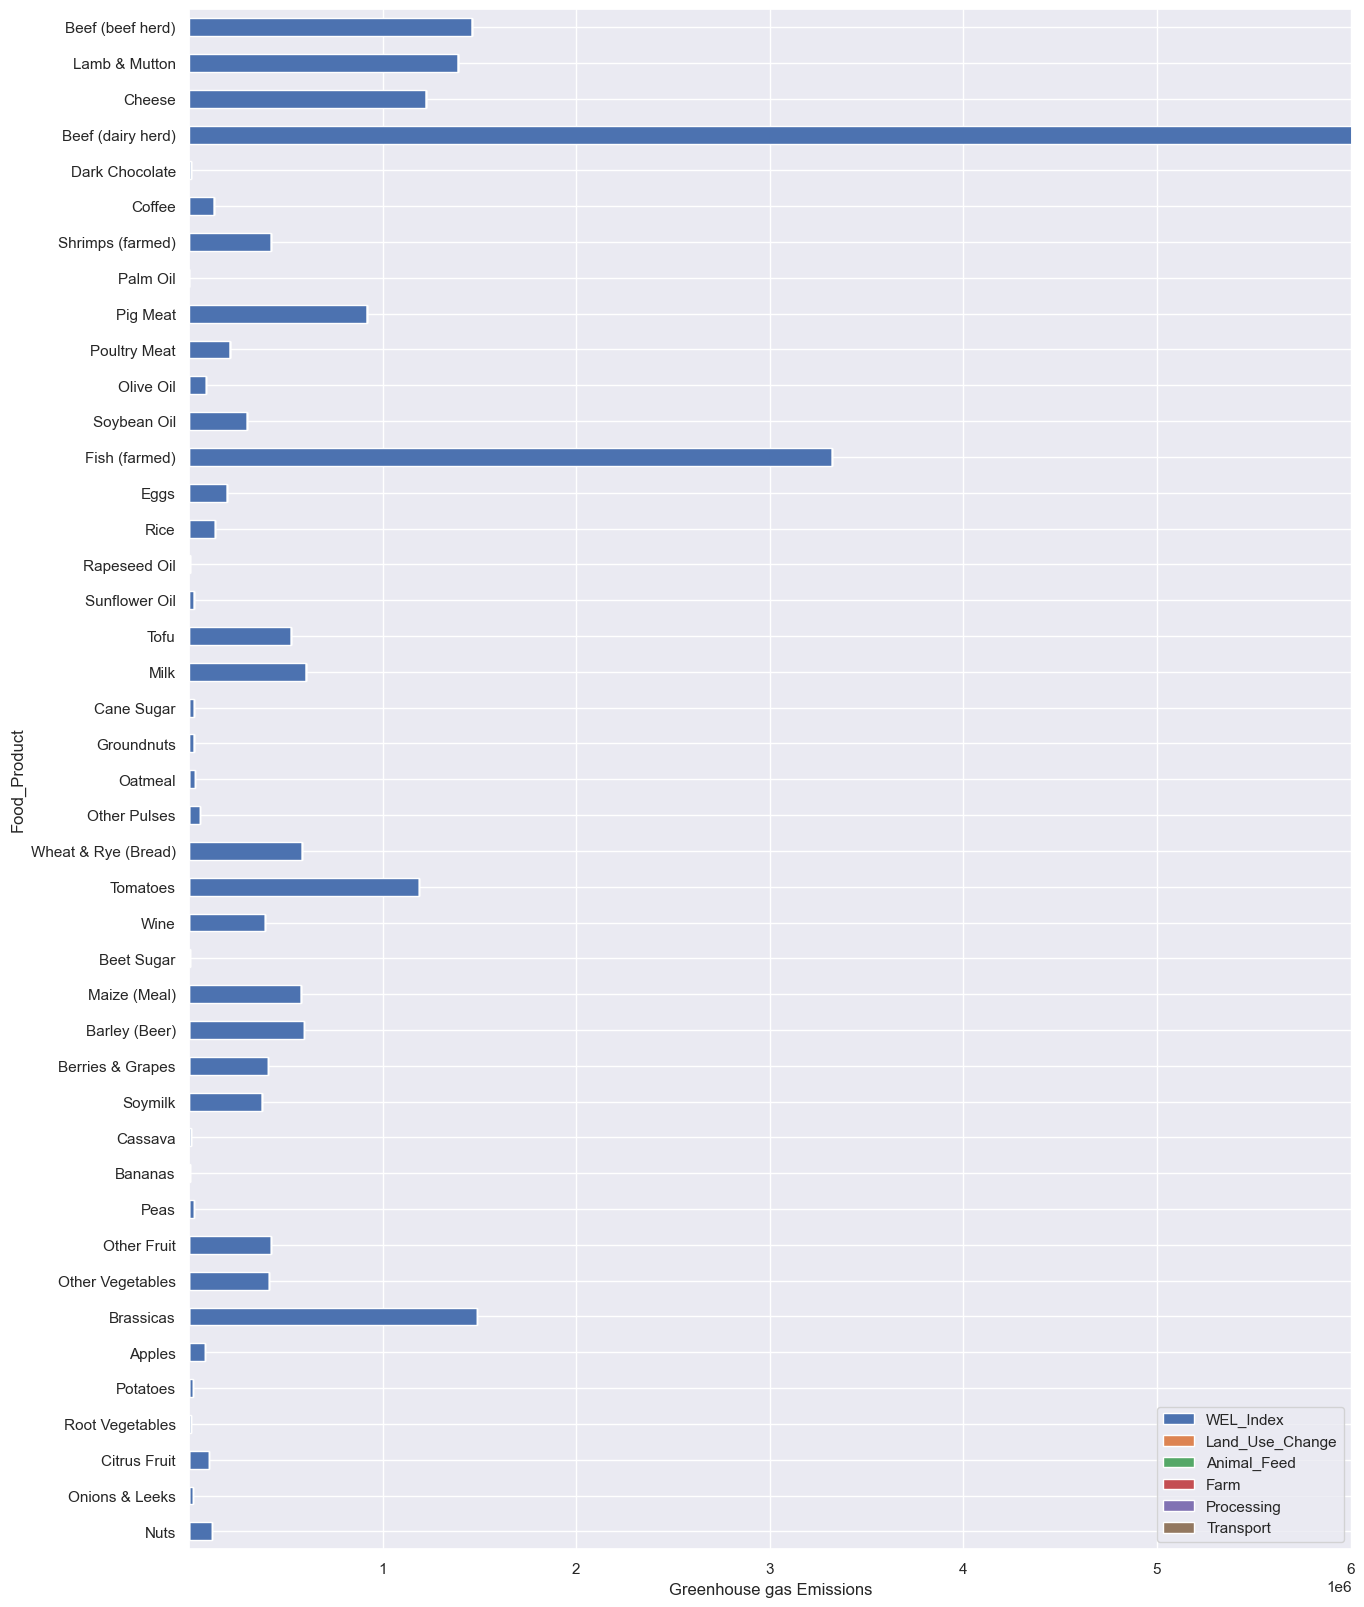

In [49]:
temp_df= df.sort_values(by= "Total_Emissions", ascending= True).iloc[:,:8]


fig, ax = plt.subplots(figsize=(15,20))
temp_df.set_index('Food_Product').plot(kind='barh', stacked=True, ax= ax)
plt.xlabel("Greenhouse gas Emissions")
plt.show()

/var/folders/j7/pkhl2l4x7csfp46d7117g6tr0000gn/T/ipykernel_42023/2244269553.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Figure size 640x480 with 0 Axes>

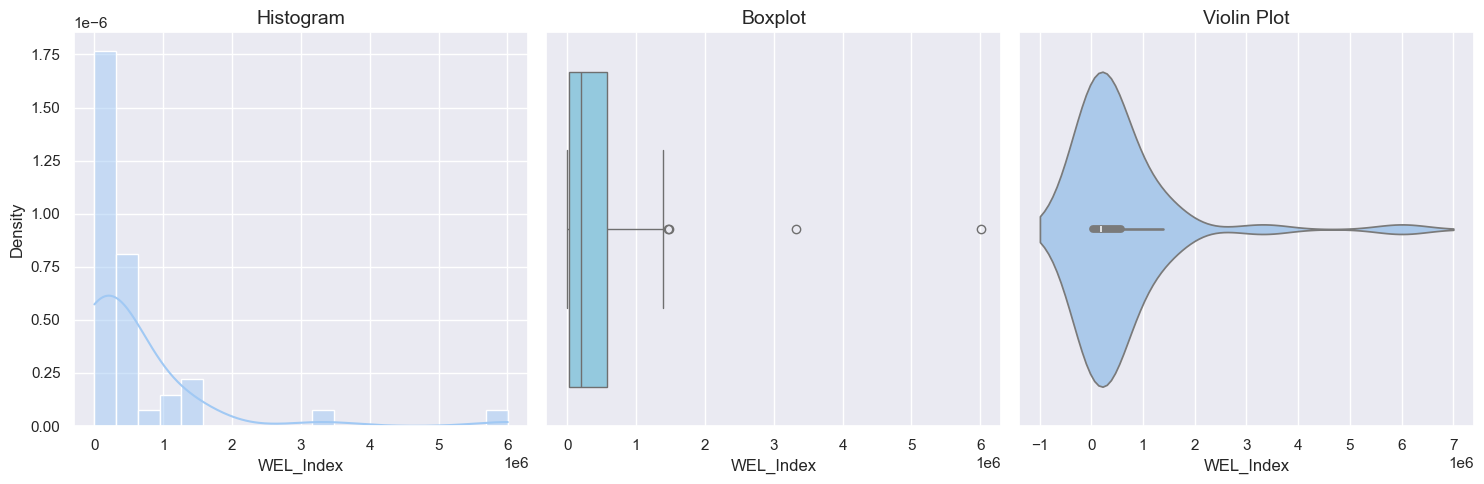

/var/folders/j7/pkhl2l4x7csfp46d7117g6tr0000gn/T/ipykernel_42023/2244269553.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




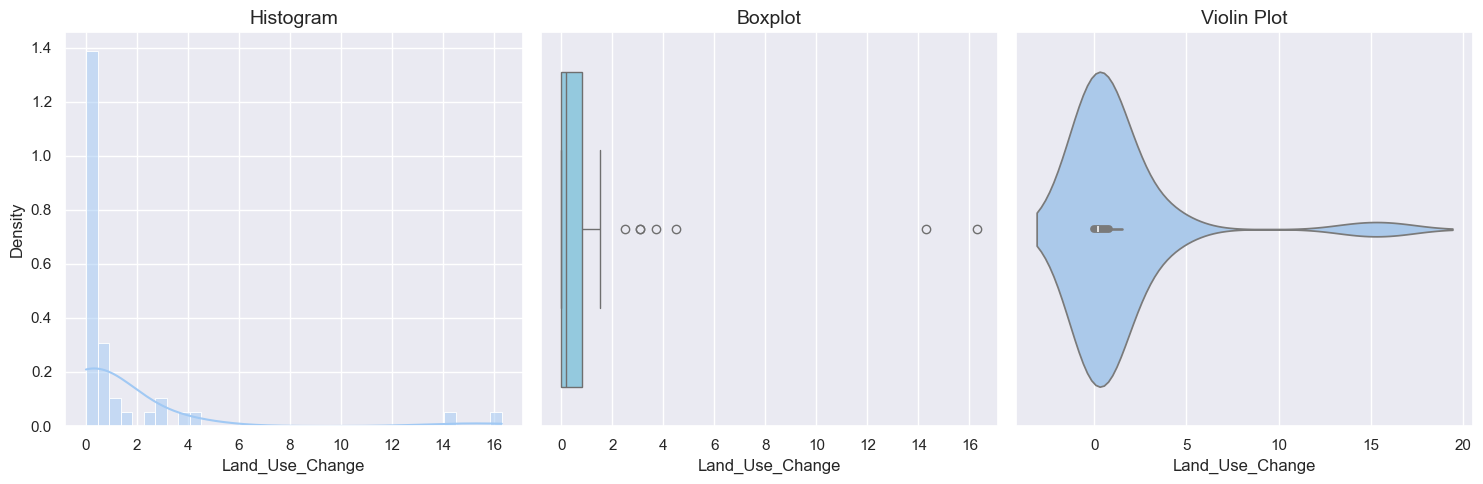

/var/folders/j7/pkhl2l4x7csfp46d7117g6tr0000gn/T/ipykernel_42023/2244269553.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




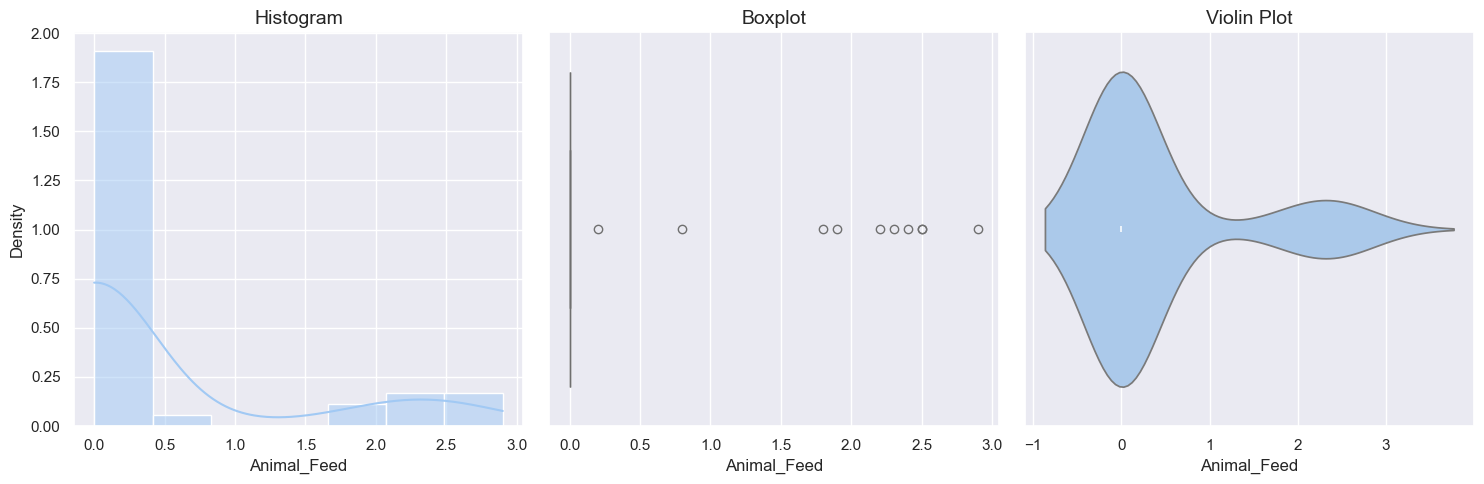

/var/folders/j7/pkhl2l4x7csfp46d7117g6tr0000gn/T/ipykernel_42023/2244269553.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




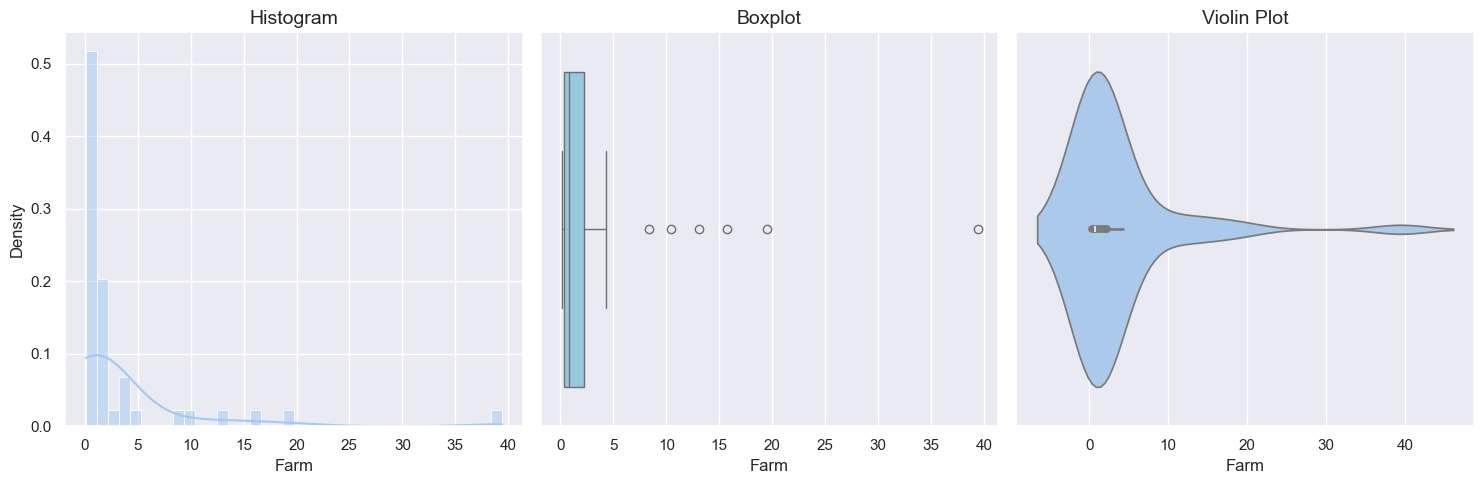

/var/folders/j7/pkhl2l4x7csfp46d7117g6tr0000gn/T/ipykernel_42023/2244269553.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




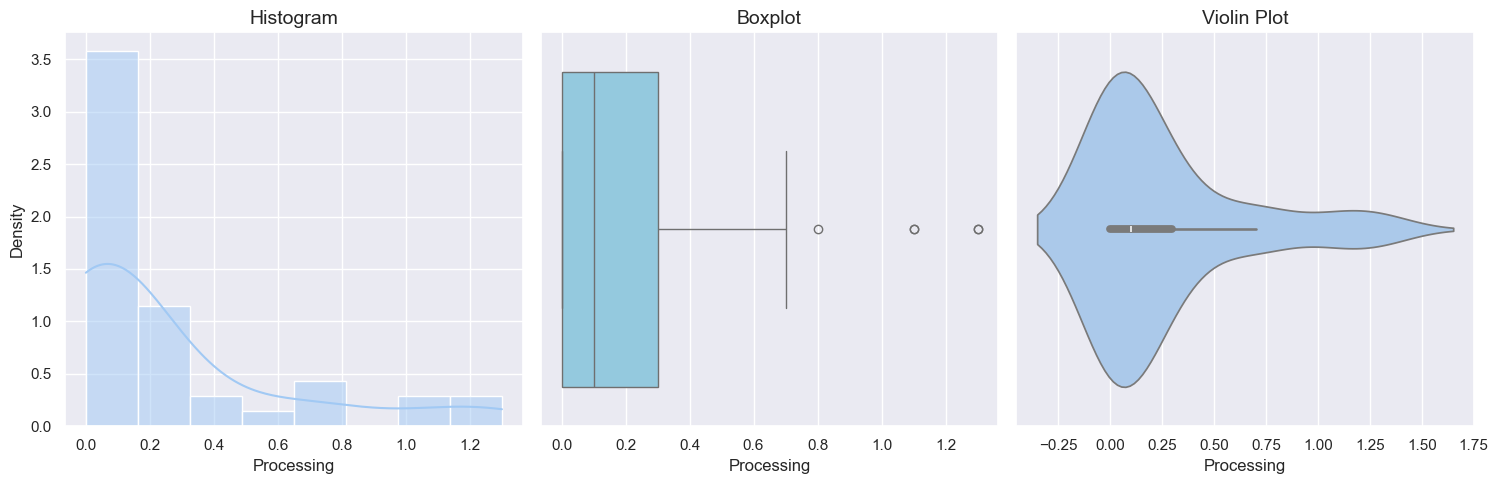

/var/folders/j7/pkhl2l4x7csfp46d7117g6tr0000gn/T/ipykernel_42023/2244269553.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




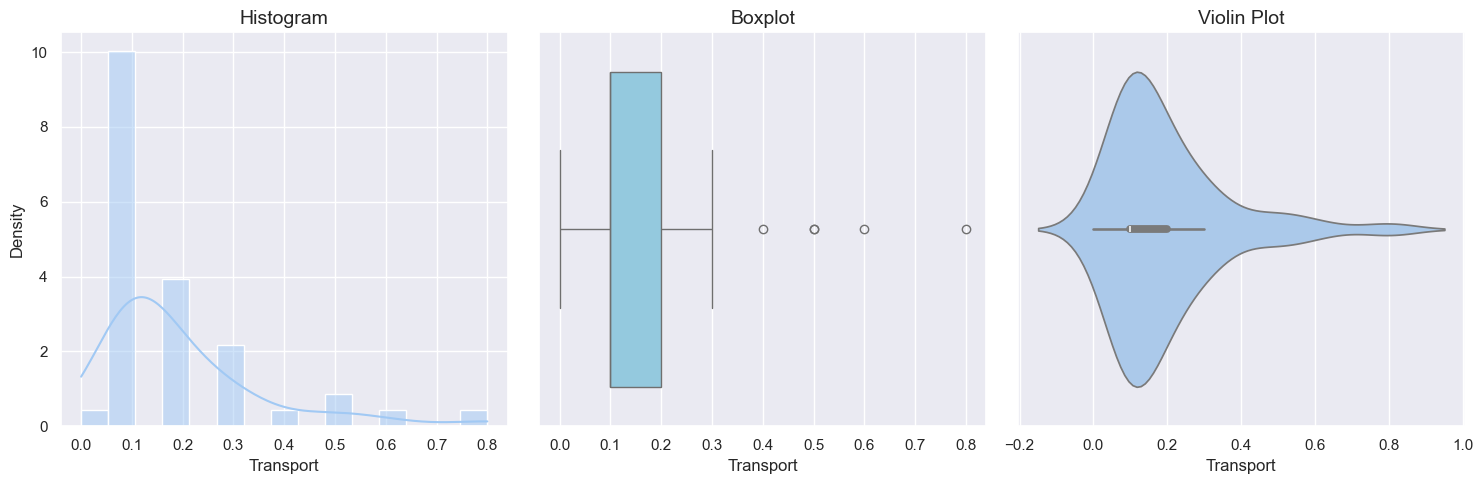

/var/folders/j7/pkhl2l4x7csfp46d7117g6tr0000gn/T/ipykernel_42023/2244269553.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




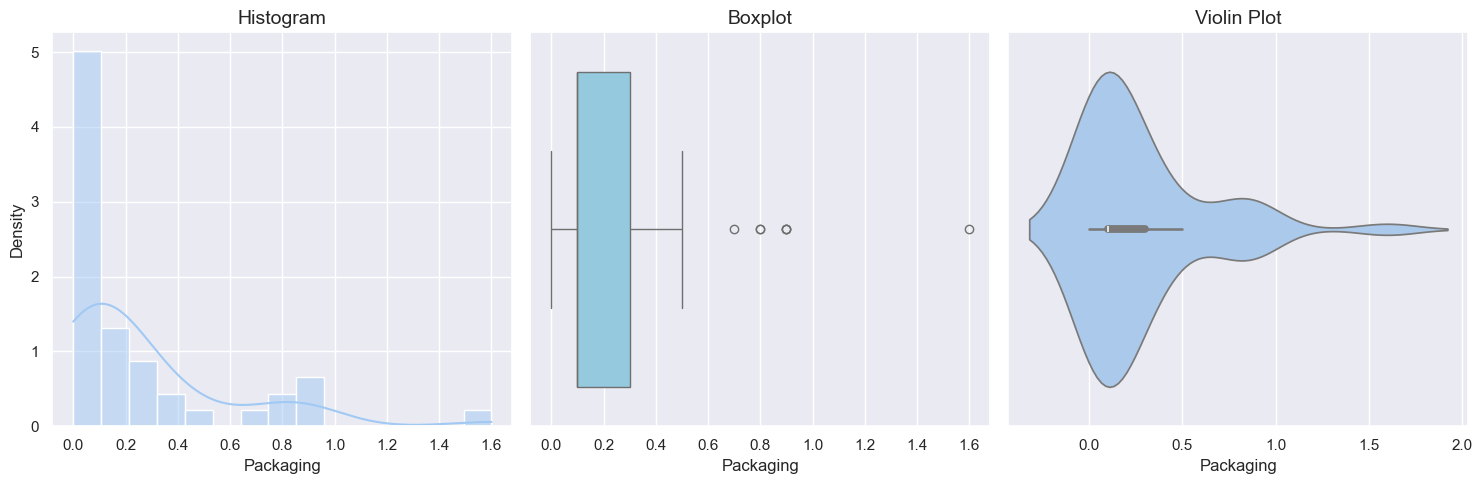

In [50]:

# Set a nice color palette
sns.set_palette("pastel")

df_operational = df.iloc[:, 1:9]
df_oper_col = df_operational.select_dtypes('number').columns

# Adjusting spacing between subplots
plt.subplots_adjust(wspace=0.5)

for col in df_oper_col:
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    # Histogram
    sns.histplot(data=df_operational, x=col, ax=ax[0], kde=True, stat="density")
    ax[0].set_title("Histogram", fontsize=14)
    ax[0].set_xlabel(col, fontsize=12)
    ax[0].set_ylabel("Density", fontsize=12)
    
    # Boxplot
    sns.boxplot(data=df_operational, x=col, ax=ax[1], color='skyblue')
    ax[1].set_title("Boxplot", fontsize=14)
    ax[1].set_xlabel(col, fontsize=12)
    
    # Violin plot
    sns.violinplot(data=df_operational, x=col, ax=ax[2], palette="pastel")
    ax[2].set_title("Violin Plot", fontsize=14)
    ax[2].set_xlabel(col, fontsize=12)
    
    # Adjusting overall layout
    plt.tight_layout()

    # Show plot
    plt.show()

/var/folders/j7/pkhl2l4x7csfp46d7117g6tr0000gn/T/ipykernel_42023/3174352758.py:11: UserWarning:

The palette list has more values (10) than needed (9), which may not be intended.



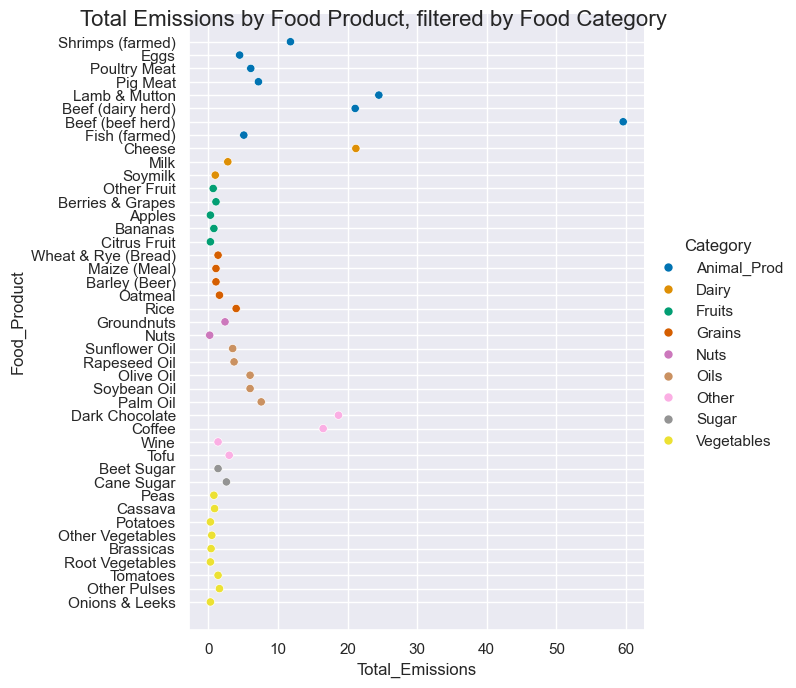

In [52]:

# Set the Seaborn style
sns.set_style("darkgrid")

# Choose a different color palette
custom_palette = sns.color_palette("colorblind")

# Sort the dataframe by 'Category' for consistent plotting
df_sorted = df.sort_values(by='Category')

# Create the relational plot with custom palette
rel_plot = sns.relplot(data=df_sorted, x='Total_Emissions', y='Food_Product',
                       hue='Category', palette=custom_palette,
                       height=7, aspect=1)

# Set plot title
rel_plot.fig.suptitle("Total Emissions by Food Product, filtered by Food Category", fontsize=16)

# Show the plot
plt.show()

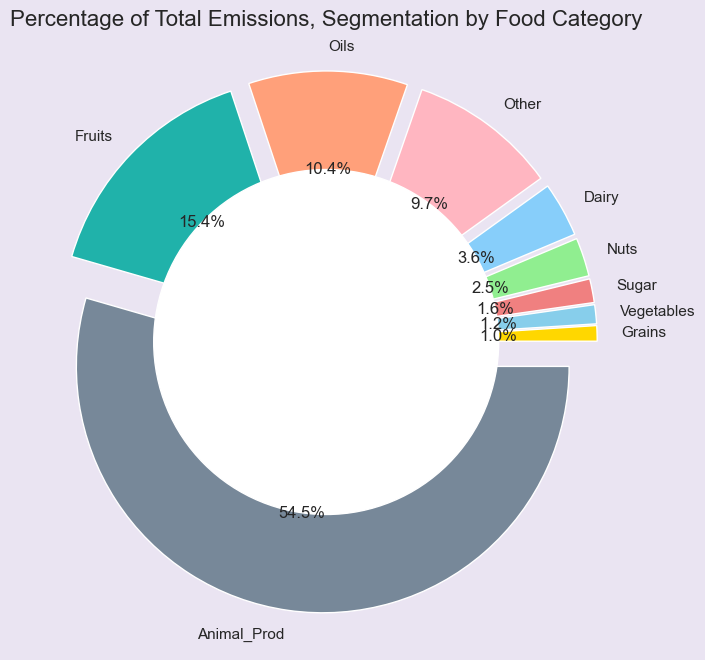

In [54]:

# Data preparation (assuming 'df' and 'labels' are defined as before)
pie_data = df.groupby(['Category'])["Total_Emissions"].sum().sort_values()
labels = list(df["Category"].unique())
explode_vals = [0.1] * len(labels)  # Adjust explode values as needed for better visualization
color_palette = ['gold', 'skyblue', 'lightcoral', 'lightgreen', 'lightskyblue', 
                 'lightpink', 'lightsalmon', 'lightseagreen', 'lightslategray']

# Create figure with specified facecolor
fig = plt.figure(figsize=(13, 8), facecolor='#eae4f2')

# Plotting the pie chart with custom colors
plt.pie(pie_data, labels=labels, autopct='%.1f%%', explode=explode_vals, colors=color_palette)

# Adding a white circle to create a donut chart effect
donut = plt.Circle((0, 0), 0.7, color='white')
plt.gca().add_artist(donut)

# Adding title
plt.title('Percentage of Total Emissions, Segmentation by Food Category', fontsize=16)

# Display the plot
plt.show()

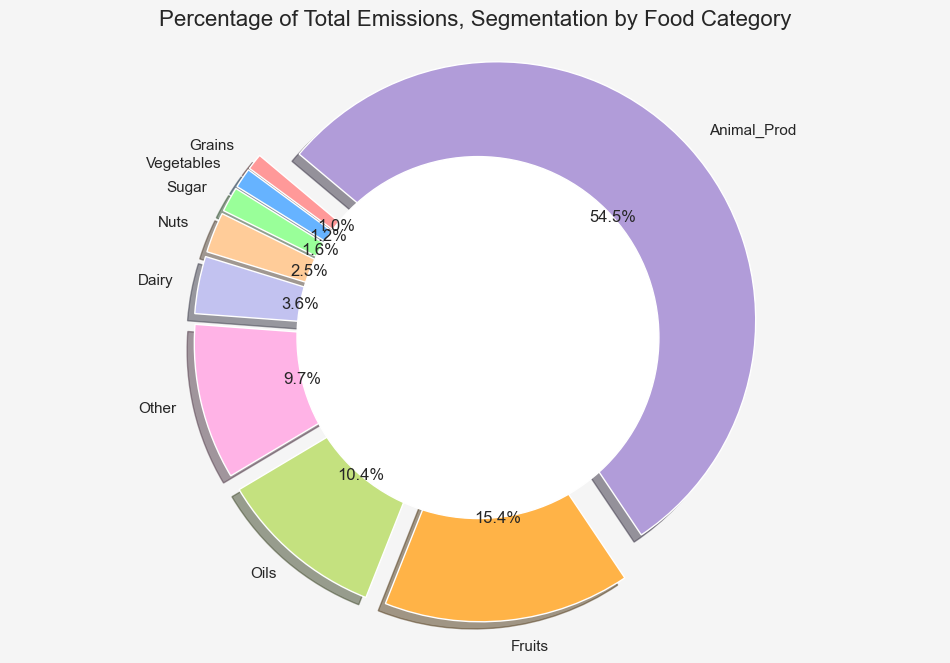

In [55]:

# Data preparation (assuming 'df' and 'labels' are defined as before)
pie_data = df.groupby(['Category'])["Total_Emissions"].sum().sort_values()
labels = list(df["Category"].unique())
explode_vals = [0.1] * len(labels)  # Adjust explode values for better visualization

# Choose a color palette for better aesthetics
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#ffb347', '#b19cd9']

# Create figure with specified facecolor
fig = plt.figure(figsize=(12, 8), facecolor='#f5f5f5')

# Plotting the pie chart with adjusted explode and colors
plt.pie(pie_data, labels=labels, autopct='%.1f%%', explode=explode_vals, colors=colors, shadow=True, startangle=140)

# Adding a circle to create a donut chart effect
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Adding title
plt.title('Percentage of Total Emissions, Segmentation by Food Category', fontsize=16)

# Display the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

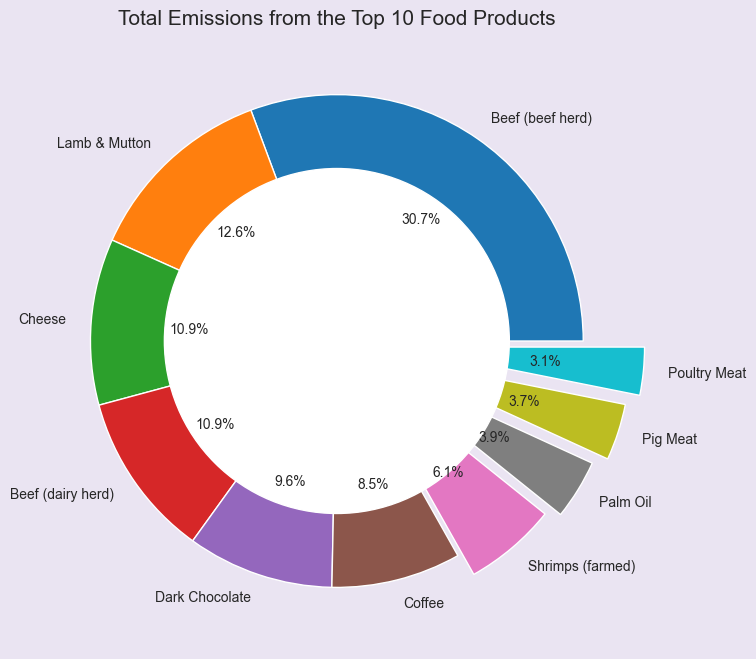

In [17]:
df_top10_emm = df.groupby(['Food_Product'])['Total_Emissions'].sum().sort_values(ascending=False).head(10)
diff_top10 = round(((df_top10_emm.sum()/df['Total_Emissions'].sum())*100),1)

labels = df_top10_emm.index
explode_vals= [0,0,0,0,0,0,0.1,0.15,0.2,0.25]

fig = plt.figure(figsize=(13,8),facecolor = '#eae4f2')
plt.pie(df_top10_emm, labels=labels, autopct='%.1f%%', explode=explode_vals)

donut = plt.Circle((0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(donut)

plt.title('Total Emissions from the Top 10 Food Products', fontsize=15)

plt.show()

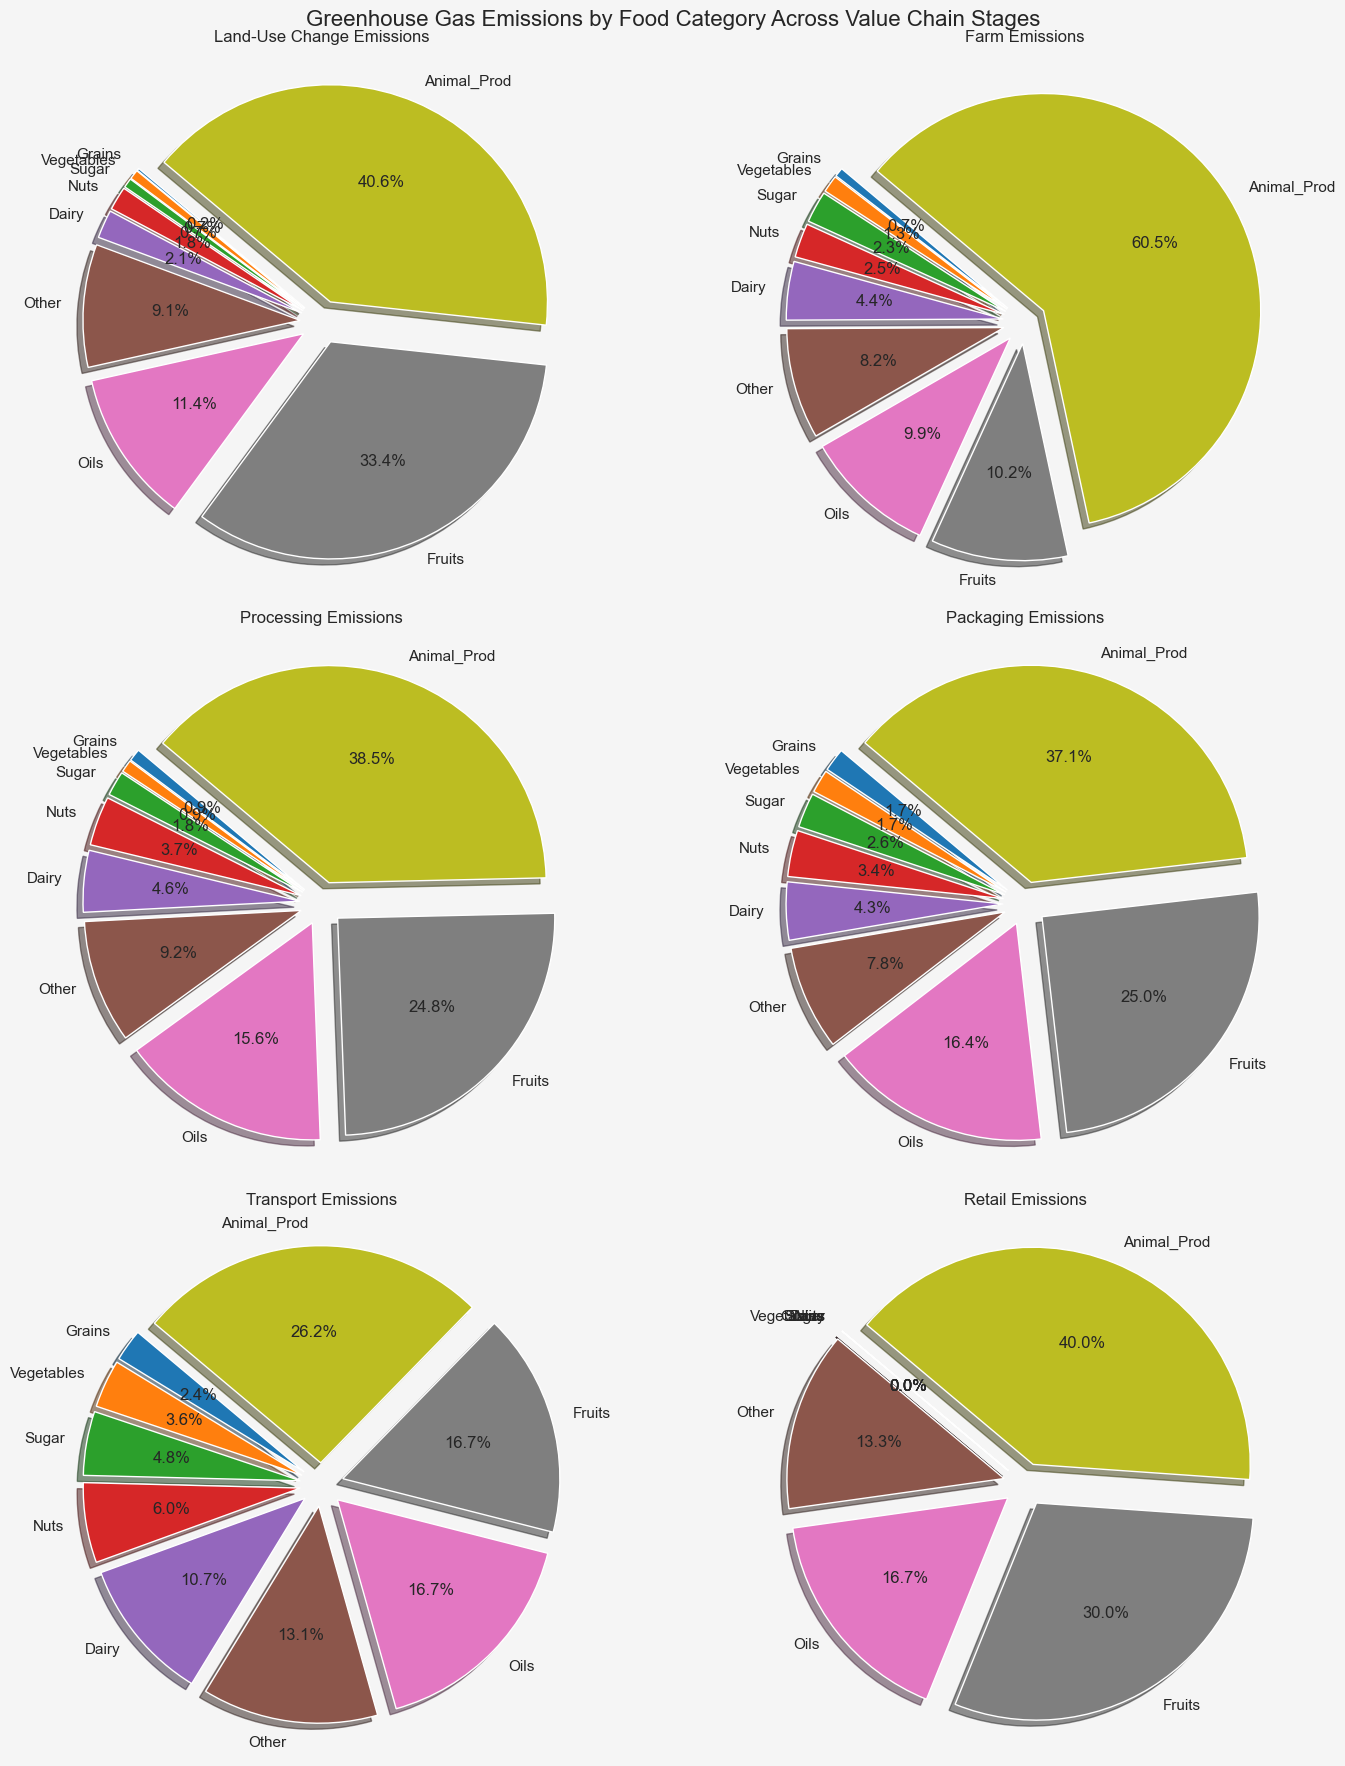

In [56]:

# Grouping and sorting data by category for each stage of the product value chain
data_land = df.groupby(['Category'])['Land_Use_Change'].sum().sort_values()
data_farm = df.groupby(['Category'])['Farm'].sum().sort_values()
data_proce = df.groupby(['Category'])['Processing'].sum().sort_values()
data_transp = df.groupby(['Category'])['Transport'].sum().sort_values()
data_pack = df.groupby(['Category'])['Packaging'].sum().sort_values()
data_ret = df.groupby(['Category'])['Retail'].sum().sort_values()

# List of unique categories and a refined color palette
labels = list(df['Category'].unique())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
explode_vals = [0.1] * len(labels)  # Adjust explode values for better visualization if needed

# Create subplots for each stage of emissions
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(15, 18), facecolor='#f5f5f5')

# Plotting each stage of emissions with custom colors and styles
ax1.pie(data_land, labels=labels, colors=colors, explode=explode_vals, autopct='%.1f%%', shadow=True, startangle=140)
ax1.set_title("Land-Use Change Emissions")
ax2.pie(data_farm, labels=labels, colors=colors, explode=explode_vals, autopct='%.1f%%', shadow=True, startangle=140)
ax2.set_title("Farm Emissions")
ax3.pie(data_proce, labels=labels, colors=colors, explode=explode_vals, autopct='%.1f%%', shadow=True, startangle=140)
ax3.set_title("Processing Emissions")
ax4.pie(data_pack, labels=labels, colors=colors, explode=explode_vals, autopct='%.1f%%', shadow=True, startangle=140)
ax4.set_title("Packaging Emissions")
ax5.pie(data_transp, labels=labels, colors=colors, explode=explode_vals, autopct='%.1f%%', shadow=True, startangle=140)
ax5.set_title("Transport Emissions")
ax6.pie(data_ret, labels=labels, colors=colors, explode=explode_vals, autopct='%.1f%%', shadow=True, startangle=140)
ax6.set_title("Retail Emissions")

# Adding a title for the entire figure
plt.suptitle('Greenhouse Gas Emissions by Food Category Across Value Chain Stages', fontsize=16)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

<Axes: >

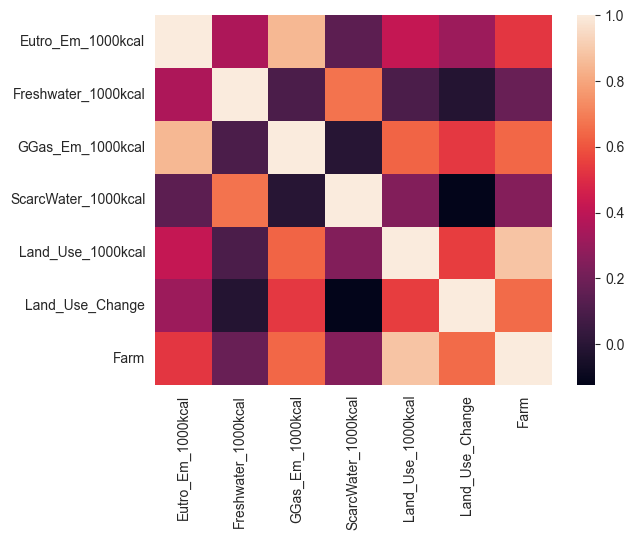

In [19]:
# Looking into the features that we will use for creation of a generalized index measurement formula

df_corr_wel = df[['Eutro_Em_1000kcal', 'Freshwater_1000kcal', 'GGas_Em_1000kcal', 'ScarcWater_1000kcal', 'Land_Use_1000kcal', 'Land_Use_Change', 'Farm']]

sns.heatmap(df_corr_wel.corr())

In [20]:
# Creating a new column with the WEL index

df.insert(2, 'WEL_Index', (((df['Freshwater_1000kcal'] + df['ScarcWater_1000kcal']) * df['Eutro_Em_1000kcal']) + df['GGas_Em_1000kcal'] / (df['Land_Use_1000kcal'] + (df['Farm']+df['Land_Use_Change'])/2)))

In [ ]:
# normalization on a 1-10 scale based on min-max values 

df['WEL_Index'] = (df['WEL_Index']-np.min(df['WEL_Index']))/(np.max(df['WEL_Index'])-np.min(df['WEL_Index']))*10

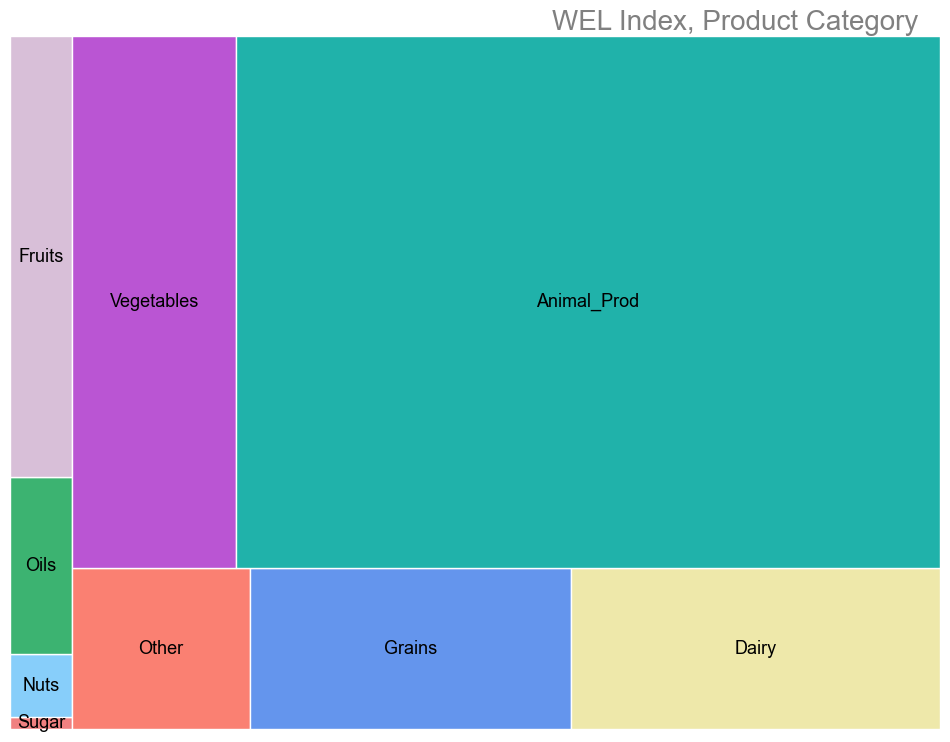

In [57]:
# Creating a general map tree with the WEL Index for food [Category]

df_wel = pd.DataFrame(df.groupby(['Category'])['WEL_Index'].sum()).sort_values(by='WEL_Index')

plt.rcParams['text.color'] = "black"
plt.rcParams['font.size'] = 13
colors = [
    'lightcoral', 'lightskyblue', 'mediumseagreen', 'thistle',  # Aesthetic choices
    'salmon', 'cornflowerblue', 'palegoldenrod', 'mediumorchid',  # Aesthetic choices continued
    'lightseagreen', 'plum', 'lightsteelblue', 'palevioletred',  # Aesthetic choices continued
]
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot()

sqf.plot(sizes = df_wel['WEL_Index'],
         label = df_wel.index,
         alpha=1, pad=False,
         color = colors,
         ax=ax)

plt.axis('off')

plt.text(78, 100,
         'WEL Index, Product Category',
         fontsize = 20, 
         color='grey', 
         horizontalalignment='center',
         verticalalignment='bottom')
        
plt.show()

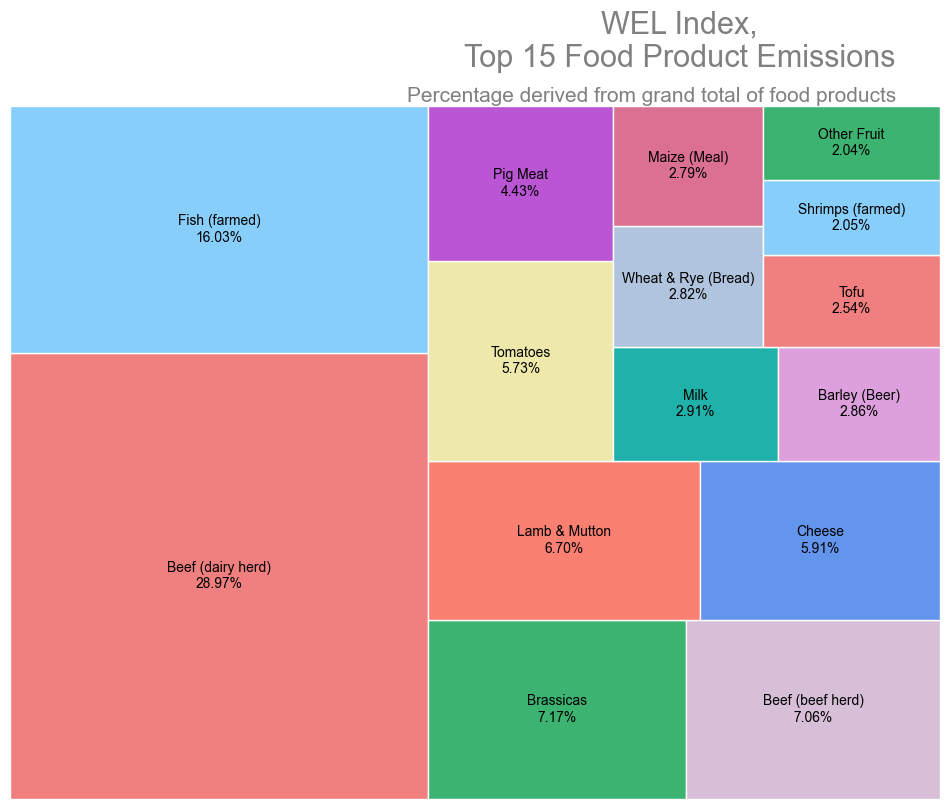

In [58]:
# Creating a map tree with percentages for the emissions of the Top 15 [Food_Products]

df_fpr = pd.DataFrame(df.groupby(['Food_Product'])['WEL_Index'].sum()).sort_values(by='WEL_Index', ascending=False).head(15)

# We will be adding percentage values in this tree map in order to increase its appeal to a wider audience
perc_vals = [f"{i/df_fpr['WEL_Index'].sum()*100:.2f}%" for i in df_fpr['WEL_Index']]
perc_vals = perc_vals[0:len(df_fpr)]

labels = [f"{i[0]}\n{i[1]}" for i in zip(df_fpr['WEL_Index'].index,perc_vals)]

plt.rcParams['text.color'] = "black"
plt.rcParams['font.size'] = 10
colors = [
    'lightcoral', 'lightskyblue', 'mediumseagreen', 'thistle',  # Aesthetic choices
    'salmon', 'cornflowerblue', 'palegoldenrod', 'mediumorchid',  # Aesthetic choices continued
    'lightseagreen', 'plum', 'lightsteelblue', 'palevioletred',  # Aesthetic choices continued
]
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot()

sqf.plot(sizes = df_fpr['WEL_Index'],
         label = labels,
         alpha=1, pad=False,
         color = colors,
        ax=ax)

plt.axis('off')

# We will add two titles with different fontsizes and different positioning in order to convey additional information.
# They need to be aligned precisely on the top right side of our tree map.
plt.text(72, 100,
         'WEL Index,\nTop 15 Food Product Emissions\n',
         fontsize = 22, 
         color ='grey', 
         horizontalalignment='center',
         verticalalignment='bottom')

plt.text(69, 100,
         '\nPercentage derived from grand total of food products',
         fontsize = 15, 
         color ='grey', 
         horizontalalignment='center',
         verticalalignment='bottom')
        
plt.show()

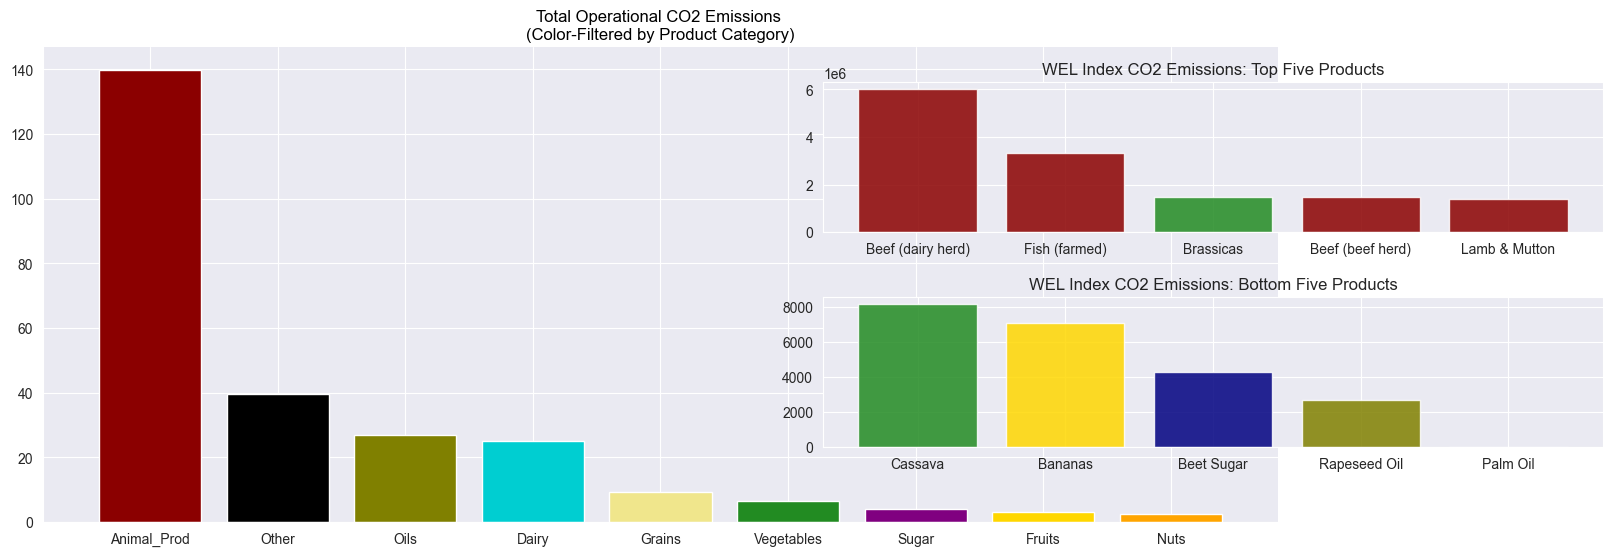

In [24]:
# Note: as mentioned earlier, Operational Emissions refers to CO2 emissions from the six features dealing with the Food Product lifecycle.
# These are: Land-Use Change, Farming, Processing, Packaging, Transportation, Retail

y1 = df.groupby(['Category'])['Total_Emissions'].sum().sort_values(ascending=False)
x1 = y1.index

y2 = df.groupby(['Food_Product'])['WEL_Index'].sum().sort_values(ascending=False).head(5)
x2 = y2.index

y3 = df.groupby(['Food_Product'])['WEL_Index'].sum().sort_values(ascending=False).tail(5)
x3 = y3.index

fig = plt.figure(figsize=(13,5))

ax1 = fig.add_axes([0.1,0.2,0.95,0.95])
ax2 = fig.add_axes([0.7,0.78,0.6,0.3])
ax3 = fig.add_axes([0.7,0.35,0.6,0.3])

# All food [Categories] are color-coded accordingly (e.g. all animal products are variations of red, vegetables variations of green, etc.)
colors1 = ['darkred', 'black','olive','darkturquoise','khaki','forestgreen','purple','gold','orange']
colors2 = ['darkred', 'darkred','forestgreen', 'darkred','darkred']
colors3 = ['forestgreen','gold','navy','olive','olive']

ax1.bar(x=x1, height=y1, color=colors1)
ax1.spines.right.set_visible(False)
ax1.spines.top.set_visible(False)
ax1.set_title("Total Operational CO2 Emissions \n(Color-Filtered by Product Category)", alpha=1)
ax2.bar(x=x2, height=y2, alpha=0.85, color=colors2)
ax2.set_title("WEL Index CO2 Emissions: Top Five Products", alpha=0.85)
ax3.bar(x=x3, height=y3, alpha=0.85, color=colors3)
ax3.set_title("WEL Index CO2 Emissions: Bottom Five Products", alpha=0.85)
plt.show()

In [26]:
data_emm = df.groupby(['Category'])['Total_Emissions'].sum().sort_values()
data_wel = df.groupby(["Category"])['WEL_Index'].sum().sort_values()

# adding the previously created sub-dfs to a new summary df
df_sum = pd.concat([data_farm, data_proce, data_transp, data_pack, data_transp, data_ret, data_emm, data_wel], axis=1)

df_sum_t = df_sum.T.round(2) # Transpose the grouped dataframe and round to 2 decimal points

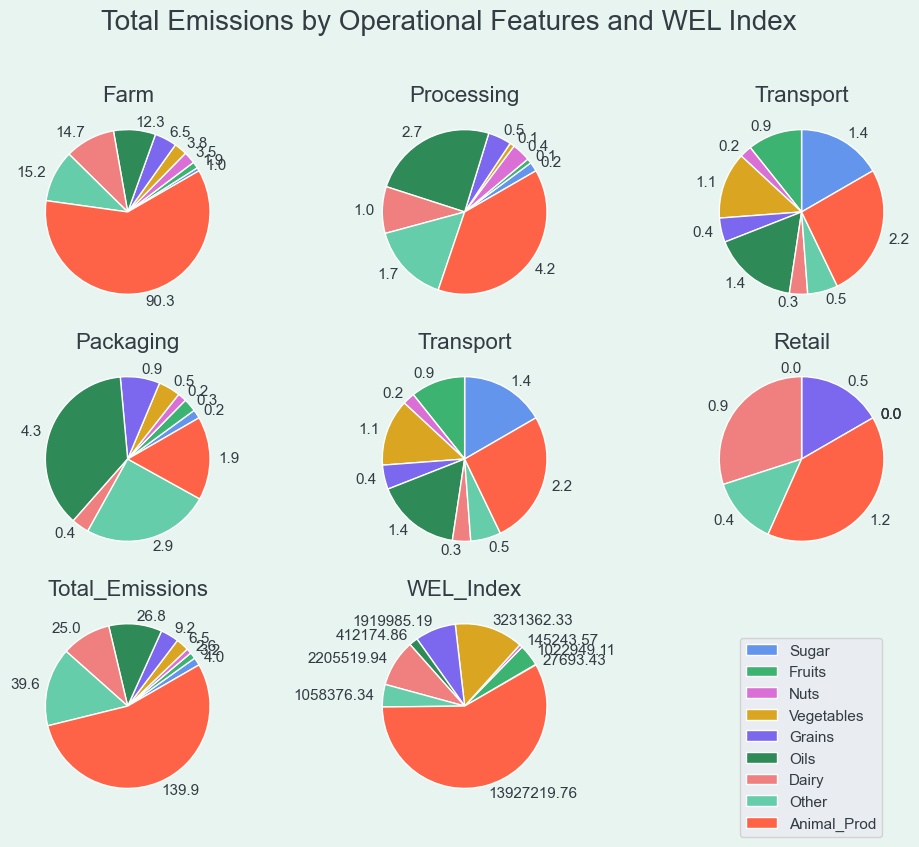

In [60]:
font_color = '#333c43'
color_vals = ["purple", "gold", "brown", "darkgreen", "khaki", "olive", "aqua", "grey", "maroon"]

fig, axes = plt.subplots(3, 3, figsize=(13, 10), facecolor='#e8f4f0')
fig.delaxes(ax = axes[2,2]) # delete the unneeded blank axes from the 3x3 plt.subplots

# iterating through the dataframe 
for row_number, (idx, row) in enumerate(df_sum_t.iterrows()):
    ax = axes[row_number // 3, row_number % 3]
    ax.pie(row, 
           labels=row.values, 
           startangle=30,
           colors=color_vals, 
           textprops={'color':font_color})
    ax.set_title(idx, fontsize=16, color=font_color)
    
    legend = plt.legend([x for x in row.index], 
                        bbox_to_anchor=(1.8, .87), # modifying position of legend
                        loc='upper left',  
                        ncol=1)
    for text in legend.get_texts():
        plt.setp(text, color=font_color) # changing legend color

fig.subplots_adjust(wspace=.01) # adjusting space between charts

title = fig.suptitle('Total Emissions by Operational Features and WEL Index', y=.95, fontsize=20, color=font_color)

plt.subplots_adjust(top=0.85, bottom=0.15)

In [61]:
# To check the relation among different attributes of foods

corrmat = df.corr(method='pearson')
f, ax = plt.subplots(figsize=(20, 15))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True, annot= True,cmap= "viridis")
plt.title("Correlation between variables \n", fontsize=20)
plt.show()

ValueError: could not convert string to float: 'Wheat & Rye (Bread)'